In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Training.csv', encoding='latin-1')

In [3]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
print(data.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [6]:
for column in data.columns:
    print(column)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [7]:
data.drop(columns=['nodal_skin_eruptions','chills','acidity','ulcers_on_tongue','muscle_wasting','burning_micturition','spotting_ urination','weight_gain','anxiety','cold_hands_and_feets','mood_swings','restlessness','lethargy','patches_in_throat','irregular_sugar_level','cough','sunken_eyes','sweating','yellowish_skin','constipation','yellow_urine','yellowing_of_eyes','fluid_overload','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose','congestion','weakness_in_limbs','pain_during_bowel_movements','irritation_in_anus'
,'cramps'
,'bruising'
,'obesity'
,'swollen_legs'
,'swollen_blood_vessels'
,'brittle_nails'
,'swollen_extremeties'
,'excessive_hunger'
,'extra_marital_contacts'
,'slurred_speech','stiff_neck','movement_stiffness'
,'spinning_movements'
,'loss_of_balance'
,'unsteadiness'
,'weakness_of_one_body_side'
,'continuous_feel_of_urine','passage_of_gases'
,'internal_itching'
,'toxic_look_(typhos)'
,'depression'
,'irritability'
,'muscle_pain'
,'altered_sensorium'
,'belly_pain'
,'dischromic _patches','watering_from_eyes'
,'increased_appetite'
,'polyuria'
,'family_history'
,'mucoid_sputum'
,'rusty_sputum'
,'lack_of_concentration'
,'visual_disturbances'
,'receiving_blood_transfusion'
,'receiving_unsterile_injections'
,'coma'
,'distention_of_abdomen'
,'fluid_overload.1'
,'blood_in_sputum','prominent_veins_on_calf'
,'palpitations'
,'painful_walking'
,'pus_filled_pimples'
,'blackheads'
,'scurring'
,'skin_peeling'
,'silver_like_dusting'
,'small_dents_in_nails'
,'inflammatory_nails'
,'blister'
,'red_sore_around_nose'
,'yellow_crust_ooze'], inplace=True)

In [8]:
data

,itching,skin_rash,continuous_sneezing,shivering,joint_pain,stomach_pain,vomiting,fatigue,weight_loss,high_fever,...,muscle_weakness,swelling_joints,loss_of_smell,bladder_discomfort,foul_smell_of urine,red_spots_over_body,abnormal_menstruation,stomach_bleeding,history_of_alcohol_consumption,prognosis
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Urinary tract infection
4918,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis


In [9]:
for column in data.columns:
    print(column)

itching
skin_rash
continuous_sneezing
shivering
joint_pain
stomach_pain
vomiting
fatigue
weight_loss
high_fever
breathlessness
dehydration
indigestion
headache
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
abdominal_pain
diarrhoea
mild_fever
acute_liver_failure
swelling_of_stomach
swelled_lymph_nodes
chest_pain
fast_heart_rate
pain_in_anal_region
bloody_stool
neck_pain
dizziness
puffy_face_and_eyes
enlarged_thyroid
drying_and_tingling_lips
knee_pain
hip_joint_pain
muscle_weakness
swelling_joints
loss_of_smell
bladder_discomfort
foul_smell_of urine
red_spots_over_body
abnormal_menstruation
stomach_bleeding
history_of_alcohol_consumption
prognosis


In [10]:
data.dtypes

itching                            int64
skin_rash                          int64
continuous_sneezing                int64
shivering                          int64
joint_pain                         int64
stomach_pain                       int64
vomiting                           int64
fatigue                            int64
weight_loss                        int64
high_fever                         int64
breathlessness                     int64
dehydration                        int64
indigestion                        int64
headache                           int64
dark_urine                         int64
nausea                             int64
loss_of_appetite                   int64
pain_behind_the_eyes               int64
back_pain                          int64
abdominal_pain                     int64
diarrhoea                          int64
mild_fever                         int64
acute_liver_failure                int64
swelling_of_stomach                int64
swelled_lymph_no

In [11]:
data['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

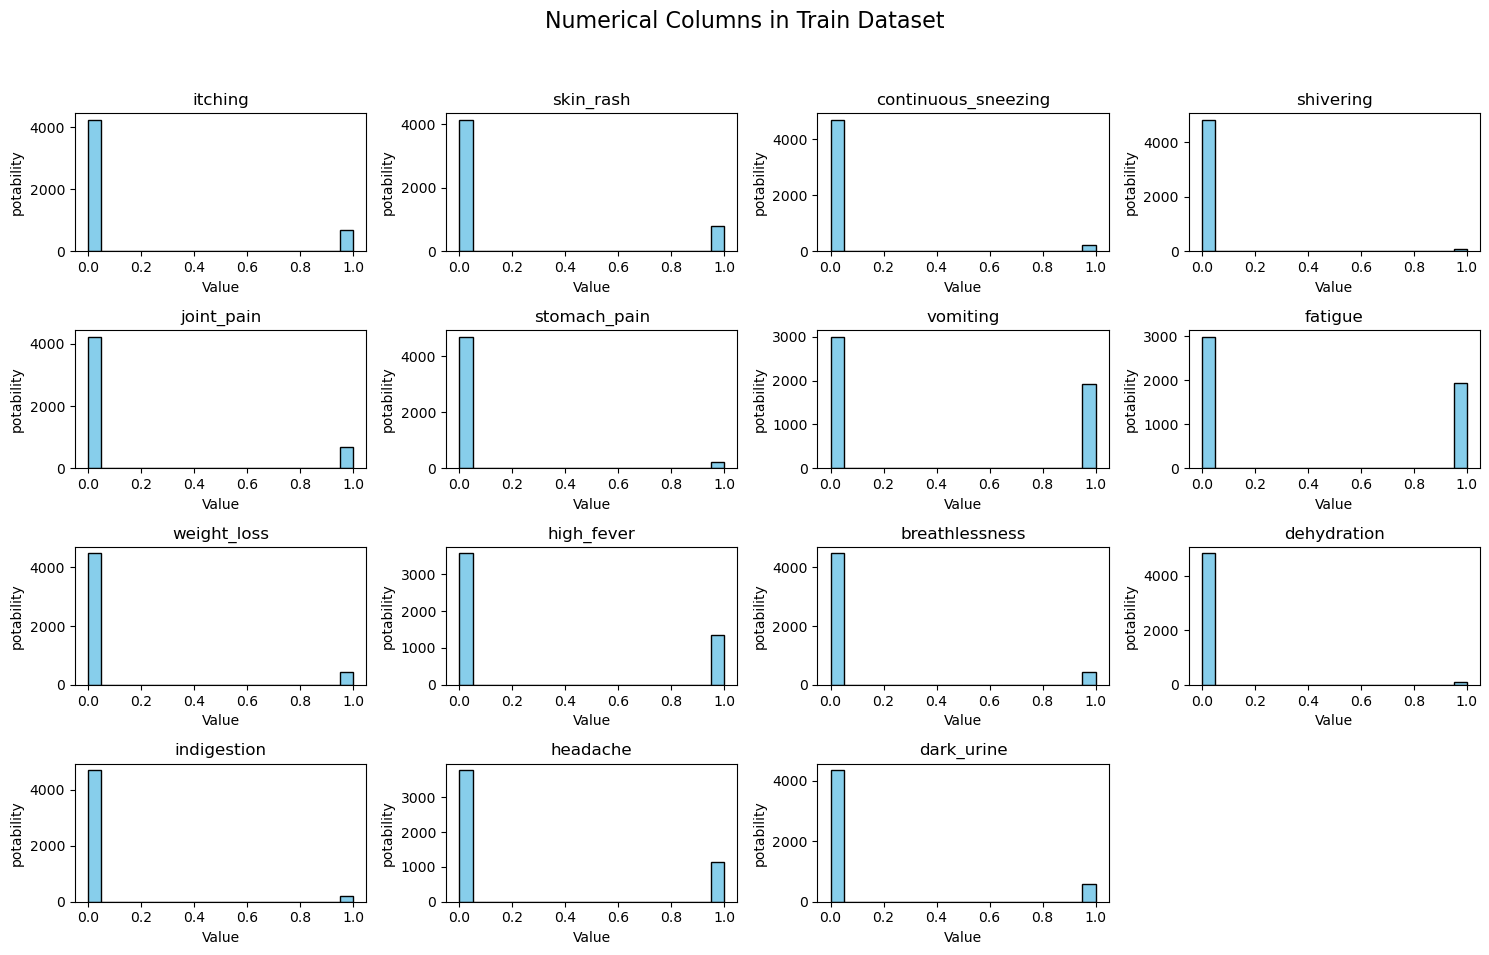

In [12]:
numerical_columns = ['itching','skin_rash','continuous_sneezing','shivering','joint_pain','stomach_pain','vomiting','fatigue','weight_loss','high_fever','breathlessness','dehydration','indigestion','headache','dark_urine']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
fig.suptitle('Numerical Columns in Train Dataset', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    axes[i].hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('potability')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

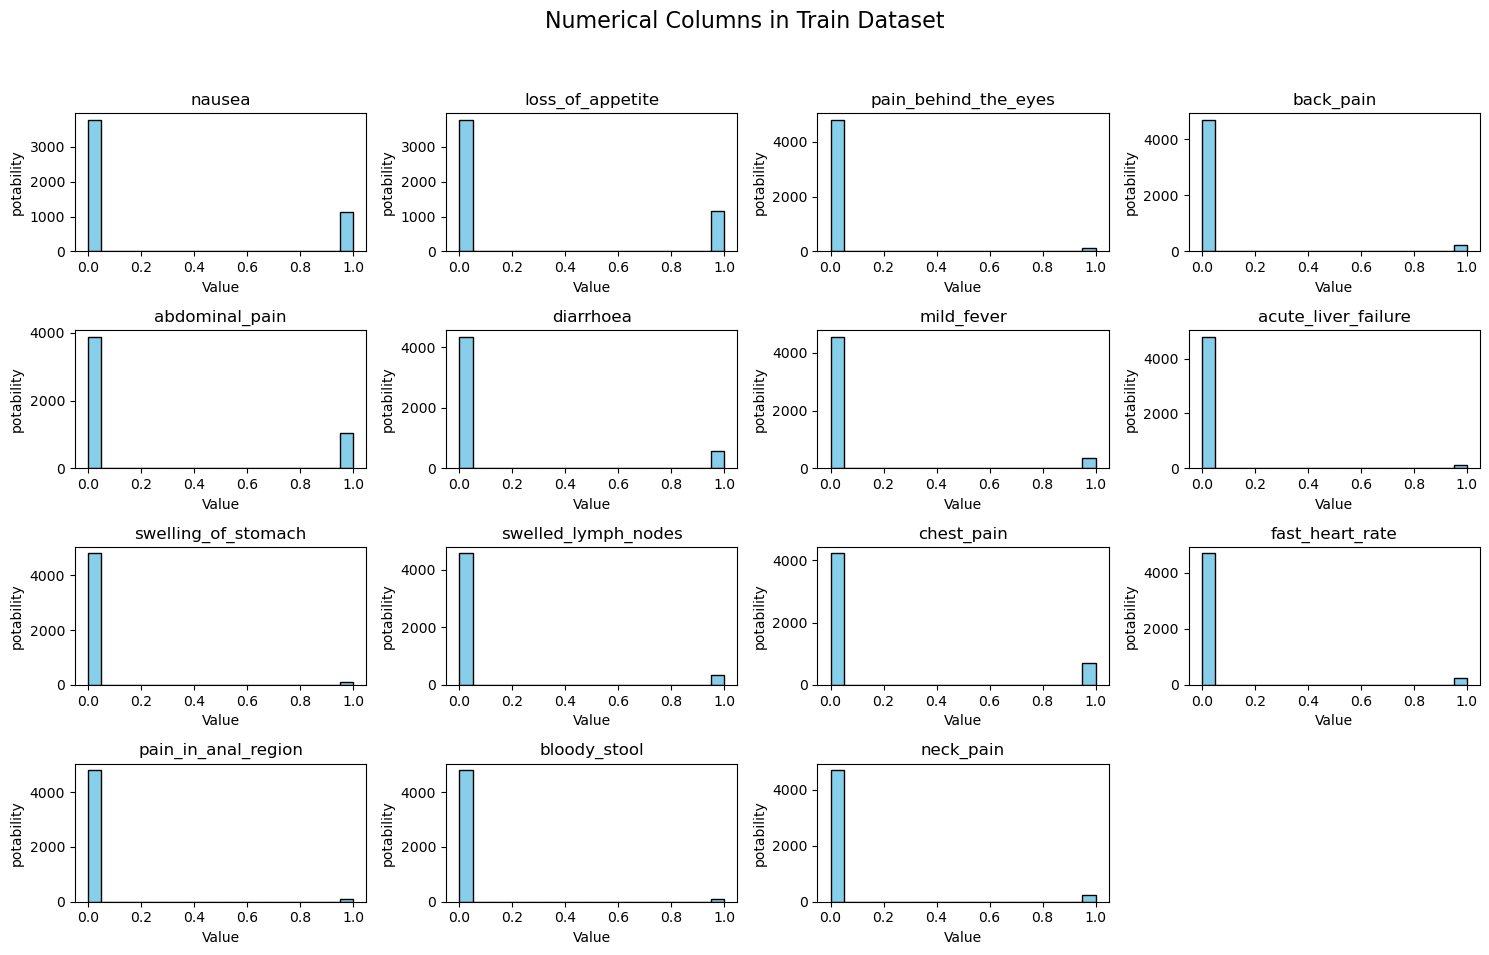

In [13]:
numerical_columns = ['nausea'
,'loss_of_appetite'
,'pain_behind_the_eyes'
,'back_pain'
,'abdominal_pain'
,'diarrhoea'
,'mild_fever'
,'acute_liver_failure'
,'swelling_of_stomach'
,'swelled_lymph_nodes'
,'chest_pain'
,'fast_heart_rate'
,'pain_in_anal_region'
,'bloody_stool'
,'neck_pain']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
fig.suptitle('Numerical Columns in Train Dataset', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    axes[i].hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('potability')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [19]:
accuracy_knn

0.9699186991869919

In [20]:
svm_model = SVC(kernel='poly', C=1.0, degree=3)
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [21]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [22]:
accuracy_svm

0.9406504065040651

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [25]:
accuracy_rf

0.9772357723577236

In [26]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9772357723577236
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.87      0.94      0.91        36
           2       0.75      1.00      0.86        33
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        29
          12       1.00      0.93      0.96        29
          13       1.00      1.00      1.00        37
          14       1.00      0.83      0.91        30
          15       0.80      0.87      0.83        23
          16       1.00      

In [31]:
predict=np.round(rf_model.predict(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


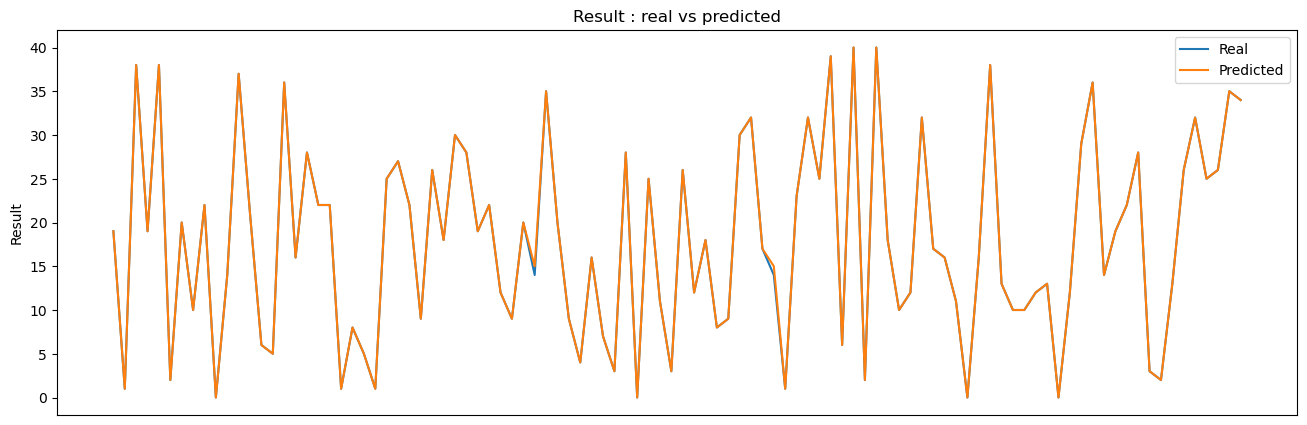

In [32]:
A = np.array(y_test).reshape(-1, 1)
B = predict.reshape(-1, 1)
print(type(predict))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Result : real vs predicted")
plt.ylabel("Result")
plt.xticks(())
plt.show()

In [27]:
pickle.dump(rf_model, open("disease.dat", "wb"))

In [33]:
pickle.dump(label_encoder, open("label_encoder.pkl", "wb"))

In [28]:
with open('disease.dat' , 'rb') as f:
    model = pickle.load(f)

In [34]:
with open('label_encoder.pkl' , 'rb') as f:
    labels = pickle.load(f)

In [ ]:
value=model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [35]:
labels.inverse_transform(value)

array(['Acne'], dtype=object)